In [ ]:
#---------Data Pre Processing and Cleaning--------------------#

#load in the data set
import pandas as pd
import numpy as np
df = pd.read_csv('PS4_GamesSales.csv', encoding='ISO-8859-1')

In [ ]:
#standardise data formats, ensuring data types are approriate for analysis
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
#Exploratory Data Analysis
print(df.describe())
print(df.info())

              Year  North America      Europe       Japan  Rest of World  \
count   825.000000     825.000000  825.000000  825.000000     825.000000   
mean   2015.966061       0.256448    0.311600    0.042048       0.111552   
std       1.298360       0.620259    0.868271    0.119814       0.274713   
min    2013.000000       0.000000    0.000000    0.000000       0.000000   
25%    2015.000000       0.000000    0.000000    0.000000       0.000000   
50%    2016.000000       0.050000    0.020000    0.000000       0.020000   
75%    2017.000000       0.190000    0.220000    0.040000       0.090000   
max    2020.000000       6.180000    9.710000    2.170000       3.020000   

           Global  
count  825.000000  
mean     0.721721  
std      1.743122  
min      0.000000  
25%      0.030000  
50%      0.120000  
75%      0.560000  
max     19.390000  
<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column         Non-Null Count 

In [ ]:
#-----------Data Preperation and Analysis--------------------#

#summarise sales by gebre and publisher
genre_sales = df.groupby('Genre')['Global'].sum().sort_values(ascending=False)
publisher_sales = df.groupby('Publisher')['Global'].sum().sort_values(ascending=False)

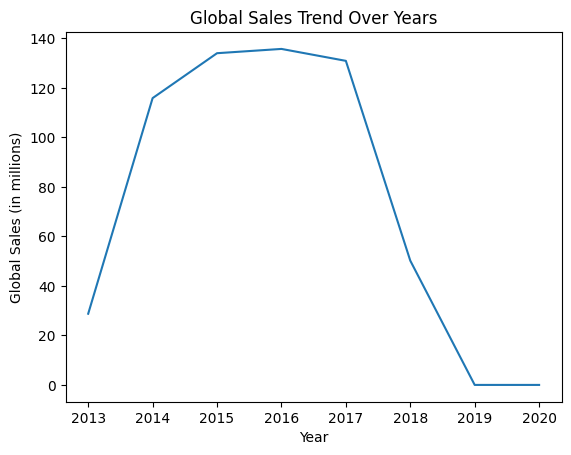

In [ ]:
#Trend Analysis
import matplotlib.pyplot as plt

yearly_sales = df.groupby('Year')['Global'].sum()
plt.plot(yearly_sales)
plt.title('Global Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()


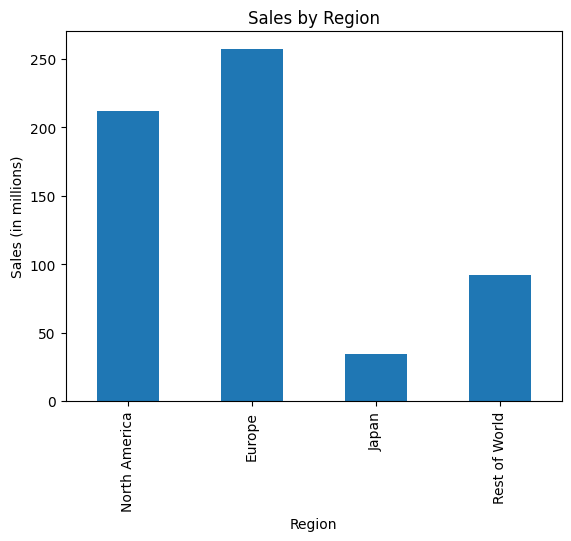

In [ ]:
#Regional Sales Analysis
region_sales = df[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.show()

In [ ]:
#Correlation Analysis
correlation = df[['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].corr()
print(correlation)

               North America    Europe     Japan  Rest of World    Global
North America       1.000000  0.810728  0.389357       0.951630  0.936347
Europe              0.810728  1.000000  0.359739       0.951293  0.961306
Japan               0.389357  0.359739  1.000000       0.393824  0.448419
Rest of World       0.951630  0.951293  0.393824       1.000000  0.997134
Global              0.936347  0.961306  0.448419       0.997134  1.000000


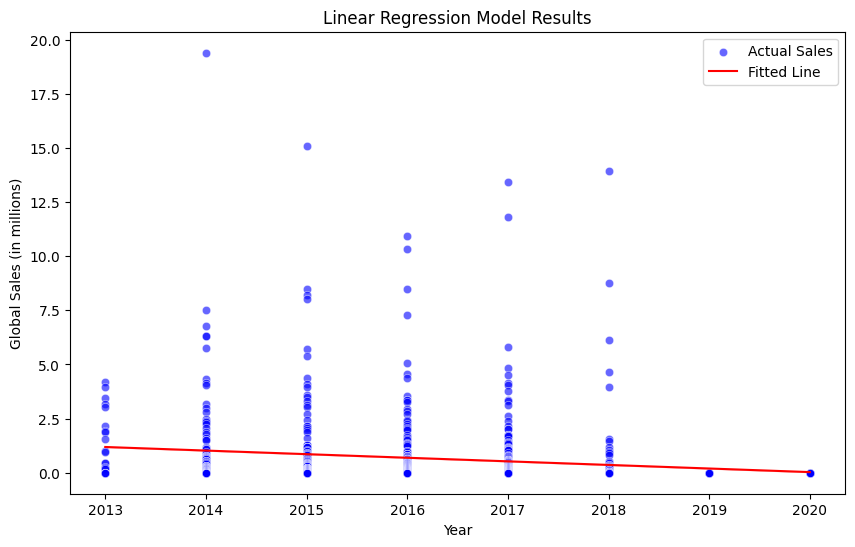

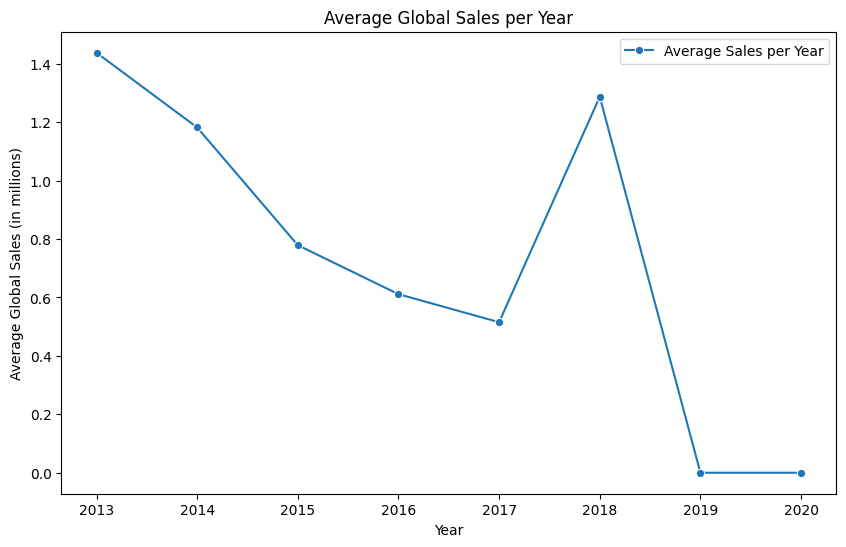

In [ ]:
#----------------Linear Regression Model------------------------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('PS4_GamesSales.csv', encoding='ISO-8859-1')

# Prepare the data
df = df.dropna(subset=['Year', 'Global'])  # Drop rows with missing values
X = df[['Year']].values.reshape(-1, 1)  # Feature: Year
y = df['Global']  # Target: Global Sales

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Year'], y=df['Global'], label='Actual Sales', color='blue', alpha=0.6)
sns.lineplot(x=X_test.flatten(), y=y_pred, label='Fitted Line', color='red')
plt.title('Linear Regression Model Results')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.show()

# Average sales per year for a clearer trend line
avg_sales_per_year = df.groupby('Year')['Global'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_sales_per_year['Year'], y=avg_sales_per_year['Global'], marker='o', label='Average Sales per Year')
plt.title('Average Global Sales per Year')
plt.xlabel('Year')
plt.ylabel('Average Global Sales (in millions)')
plt.legend()
plt.show()


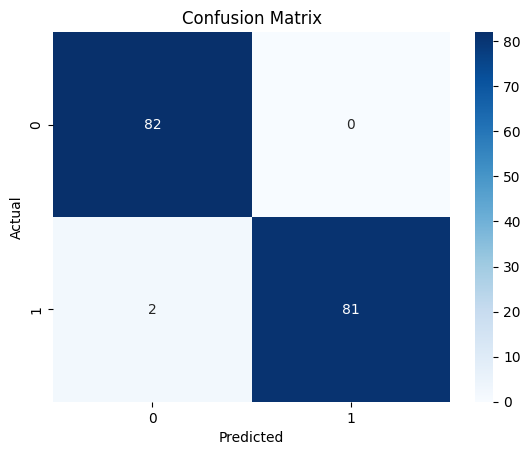

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       1.00      0.98      0.99        83

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165



In [ ]:
#---------Random Forest Classifier-------------#

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the dataset
df = pd.read_csv('PS4_GamesSales.csv', encoding='ISO-8859-1')

# Preprocessing the data
df = df.dropna(subset=['Year', 'Global'])  # Drop rows with missing values
df['Genre'] = df['Genre'].astype('category').cat.codes  # Convert genre to numerical codes

# Features and target
X = df[['Year', 'Genre', 'North America', 'Europe', 'Japan', 'Rest of World']]
y = (df['Global'] > df['Global'].median()).astype(int)  # Binary target: 1 if above median, 0 otherwise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))




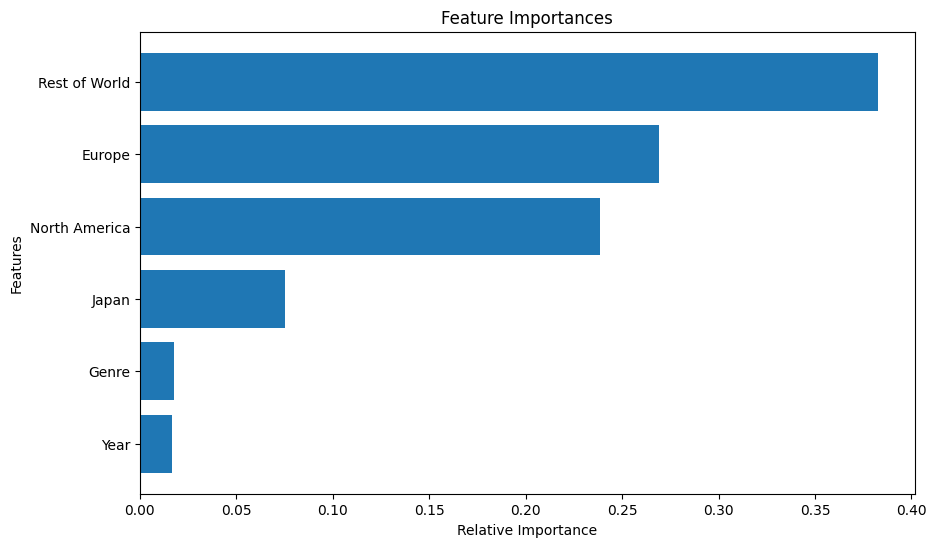

In [ ]:
#Visualise Feature Importance
# Plot feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

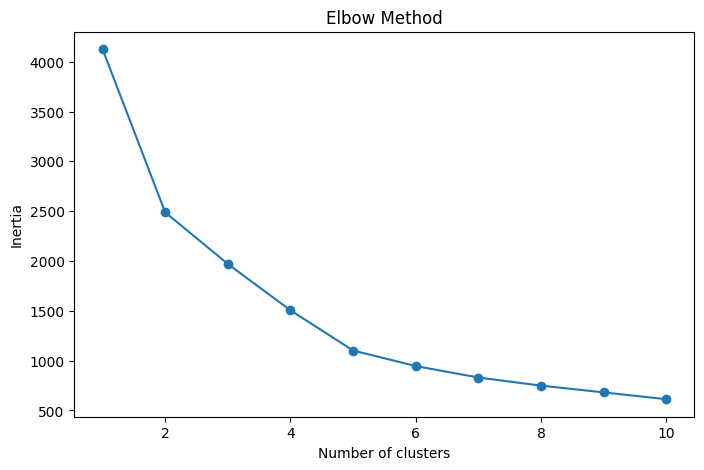

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.42029147317602983


In [ ]:
#-------K Means Clustering-----------#

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features for clustering
X = df[['Year', 'North America', 'Europe', 'Japan', 'Rest of World']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Training the Model
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., k=3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Evaluate the Model
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')


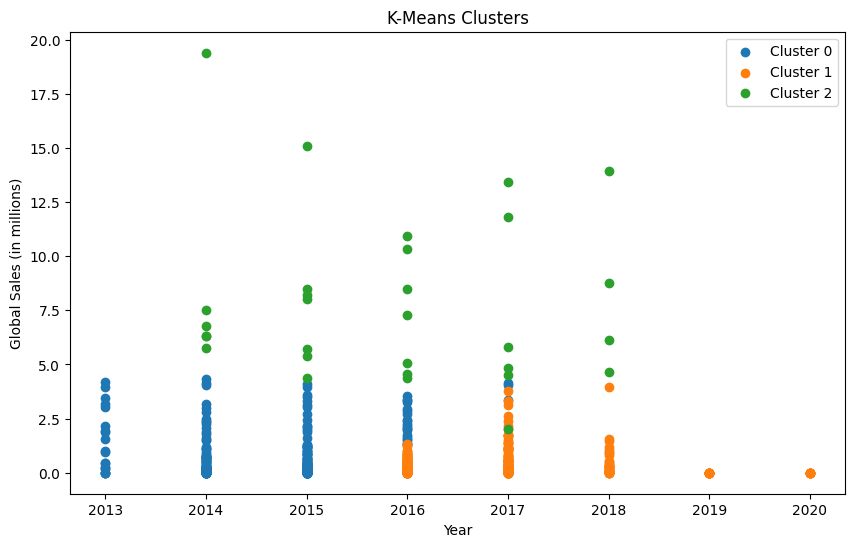

In [ ]:
#Visualise Results
# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Year'], cluster_data['Global'], label=f'Cluster {cluster}')
plt.title('K-Means Clusters')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('PS4_GamesSales.csv', encoding='ISO-8859-1')

# Remove rows with missing 'Year' values
df_cleaned = df.dropna(subset=['Year'])

# Convert the 'Year' column to integer type
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

# Group by 'Year' and get the first game of each year
first_game_each_year = df_cleaned.groupby('Year').first().reset_index()

# Display the 'Year' and 'Game' columns
print(first_game_each_year[['Year', 'Game']])



   Year                         Game
0  2013         Call of Duty: Ghosts
1  2014           Grand Theft Auto V
2  2015    Call of Duty: Black Ops 3
3  2016                      FIFA 17
4  2017           Call of Duty: WWII
5  2018        Red Dead Redemption 2
6  2019  Brothers in Arms: Furious 4
7  2020    deep down (Working Title)


<ipython-input-13-37b4247815a0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['Year'].astype(int)
